# STAT 3010 — Chapter 1: Exploratory Data Analysis (EDA) in Python  
## Numeric + data-based examples from lecture slides (beginner-friendly)

This notebook reproduces the **data-based** examples from the slides using simple, conventional Python.

**You will practice**
- Mean and median (and how outliers affect them)
- Quartiles, five-number summary, IQR
- Sample variance and standard deviation
- How mean/sd change when we shift or scale data
- Stem-and-leaf display (Old Faithful data)
- Histogram class table (frequency, relative frequency, density)
- Boxplot + IQR outlier rule (Old Faithful data)

> Run cells from top to bottom. If you get an error, read the message carefully—it usually tells you what to fix.


## 0) Setup (run this cell first)

We will use:
- **NumPy** for calculations
- **Matplotlib** for simple plots (histogram, boxplot)

We keep things simple. No fancy programming needed for now.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)


## 1) Mean vs Median (Monthly incomes example)

From the slides: monthly incomes (in **thousands of dollars**) for 5 employees are:

- 3, 2, 4, 3, 20

We compute the **mean** and **median**, then see how results change if we remove the outlier (20).


In [ ]:
# Data (in thousands of dollars)
incomes = [3, 2, 4, 3, 20]
incomes

[3, 2, 4, 3, 20]

### 1.1 Sort the data (median uses sorted data)

In [ ]:
sorted_incomes = sorted(incomes)
sorted_incomes

[2, 3, 3, 4, 20]

### 1.2 Mean (average)

In [ ]:
n = len(incomes)
mean_manual = sum(incomes) / n
mean_manual

6.4

Confirm with NumPy.

In [ ]:
np.mean(incomes)

np.float64(6.4)

### 1.3 Median (middle value)

In [ ]:
median_manual = sorted_incomes[n // 2]
median_manual

3

Confirm with NumPy.

In [ ]:
np.median(incomes)

np.float64(3.0)

### 1.4 Outlier sensitivity check

Compare mean/median **with** and **without** the outlier 20.


In [ ]:
incomes_no_outlier = [3, 2, 4, 3]  # removed the 20

mean_with = np.mean(incomes)
median_with = np.median(incomes)

mean_without = np.mean(incomes_no_outlier)
median_without = np.median(incomes_no_outlier)

(mean_with, median_with), (mean_without, median_without)

((np.float64(6.4), np.float64(3.0)), (np.float64(3.0), np.float64(3.0)))

**Interpretation:** Removing the outlier changes the **mean** a lot, but the **median** changes much less.


## 2) Quartiles (Q1, Q2, Q3) example

From the slides, the sample is:

8, 3, 7, 12, 13, 18, 14

We compute Q1, Q2 (median), Q3 using the same *definition used in class*:
- Q2 = median
- Q1 = median of lower half (excluding the median when n is odd)
- Q3 = median of upper half (excluding the median when n is odd)


In [ ]:
data = [8, 3, 7, 12, 13, 18, 14]
data_sorted = sorted(data)
data_sorted

[3, 7, 8, 12, 13, 14, 18]

### 2.1 Q2 (median)

In [ ]:
n = len(data_sorted)
q2 = data_sorted[n // 2]
q2

12

### 2.2 Lower and upper halves (exclude the median for odd n)

In [ ]:
lower_half = data_sorted[:n // 2]
upper_half = data_sorted[n // 2 + 1:]
lower_half, upper_half

([3, 7, 8], [13, 14, 18])

### 2.3 Q1 and Q3 (medians of halves)

In [ ]:
q1 = lower_half[len(lower_half) // 2]
q3 = upper_half[len(upper_half) // 2]
q1, q2, q3

(7, 12, 14)

This matches the slide values: **Q1 = 7, Q2 = 12, Q3 = 14**.


## 3) Five-number summary and IQR

- Five-number summary = (min, Q1, median, Q3, max)
- IQR = Q3 − Q1


In [ ]:
five_number_summary = (min(data_sorted), q1, q2, q3, max(data_sorted))
iqr = q3 - q1
five_number_summary, iqr

((3, 7, 12, 14, 18), 7)

## 4) Sample variance and sample standard deviation

We compute sample variance and standard deviation (these use **n − 1** in the denominator).


In [ ]:
x = np.array(data, dtype=float)
n = len(x)

x_bar = np.mean(x)
s2_manual = np.sum((x - x_bar)**2) / (n - 1)   # sample variance
s_manual = np.sqrt(s2_manual)                  # sample standard deviation

float(x_bar), float(s2_manual), float(s_manual)

(10.714285714285714, 25.23809523809524, 5.023753102820166)

Confirm with NumPy (`ddof=1` gives sample versions).

In [ ]:
np.var(x, ddof=1), np.std(x, ddof=1)

(np.float64(25.23809523809524), np.float64(5.023753102820166))

## 6) Old Faithful data: stem-and-leaf + histogram

From the slides, we have 60 between-eruption times for the geyser Old Faithful (in minutes).  
We will:
1) Enter the data
2) Build a **stem-and-leaf** display
3) Build a **histogram class table** (intervals, frequency, relative frequency, density)
4) Draw frequency and density histograms


In [ ]:
old_faithful = [
    42, 45, 49, 50, 51, 51, 51, 51, 53, 53, 55, 55, 56, 56, 57, 58,
    60, 66, 67, 67, 68, 69,
    70, 71, 72, 73, 73, 74, 75, 75, 75, 75,
    76, 76, 76, 76, 76, 79, 79,
    80, 80, 80, 80, 81, 82, 82, 82, 83, 83,
    84, 84, 84, 85, 86, 86, 86, 88, 90, 91, 93
]
len(old_faithful), min(old_faithful), max(old_faithful)

(60, 42, 93)

### 6.1 Stem-and-leaf display

In [ ]:
def stem_and_leaf(values):
    values_sorted = sorted(values)
    stems = {}
    for v in values_sorted:
        stem = v // 10
        leaf = v % 10
        stems.setdefault(stem, []).append(leaf)

    for stem in sorted(stems.keys()):
        leaves_str = "".join(str(leaf) for leaf in stems[stem])
        print(f"{stem} | {leaves_str}")

stem_and_leaf(old_faithful)

4 | 259
5 | 0111133556678
6 | 067789
7 | 01233455556666699
8 | 000012223344456668
9 | 013


### 6.2 Histogram class table (slide bins)

Bins of width 5 minutes:
[40,45), [45,50), …, [90,95)

We compute:
- frequency
- relative frequency
- density = relative frequency / class width


In [ ]:
values = np.array(old_faithful, dtype=float)
bins = np.array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
width = 5

freq, edges = np.histogram(values, bins=bins)
total = len(values)

rel_freq = freq / total
density = rel_freq / width

intervals = [f"[{int(edges[i])}, {int(edges[i+1])})" for i in range(len(edges)-1)]
table = list(zip(intervals, freq, np.round(rel_freq, 3), np.round(density, 3)))
table

[('[40, 45)', np.int64(1), np.float64(0.017), np.float64(0.003)),
 ('[45, 50)', np.int64(2), np.float64(0.033), np.float64(0.007)),
 ('[50, 55)', np.int64(7), np.float64(0.117), np.float64(0.023)),
 ('[55, 60)', np.int64(6), np.float64(0.1), np.float64(0.02)),
 ('[60, 65)', np.int64(1), np.float64(0.017), np.float64(0.003)),
 ('[65, 70)', np.int64(5), np.float64(0.083), np.float64(0.017)),
 ('[70, 75)', np.int64(6), np.float64(0.1), np.float64(0.02)),
 ('[75, 80)', np.int64(11), np.float64(0.183), np.float64(0.037)),
 ('[80, 85)', np.int64(13), np.float64(0.217), np.float64(0.043)),
 ('[85, 90)', np.int64(5), np.float64(0.083), np.float64(0.017)),
 ('[90, 95)', np.int64(3), np.float64(0.05), np.float64(0.01))]

In [ ]:
print(f"{'Interval':<10} {'Freq':>4} {'RelFreq':>8} {'Density':>8}")
for interval, f, rf, d in table:
    print(f"{interval:<10} {f:>4} {rf:>8.3f} {d:>8.3f}")
print("-" * 34)
print(f"{'Total':<10} {sum(freq):>4} {sum(rel_freq):>8.3f}")

Interval   Freq  RelFreq  Density
[40, 45)      1    0.017    0.003
[45, 50)      2    0.033    0.007
[50, 55)      7    0.117    0.023
[55, 60)      6    0.100    0.020
[60, 65)      1    0.017    0.003
[65, 70)      5    0.083    0.017
[70, 75)      6    0.100    0.020
[75, 80)     11    0.183    0.037
[80, 85)     13    0.217    0.043
[85, 90)      5    0.083    0.017
[90, 95)      3    0.050    0.010
----------------------------------
Total        60    1.000


### 6.3 Frequency and density histograms

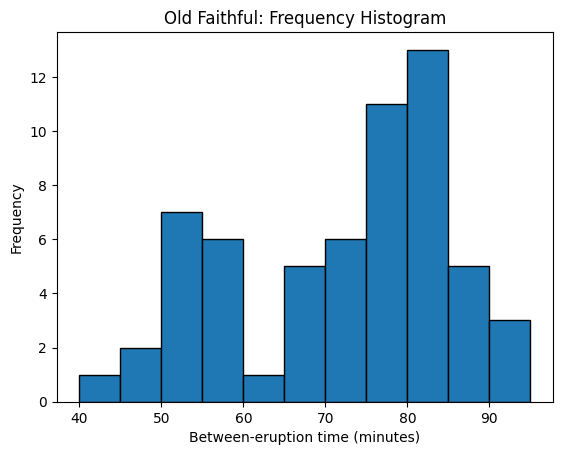

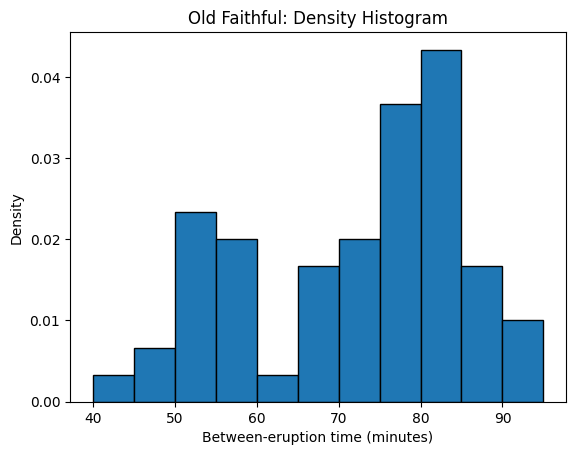

In [ ]:
plt.figure()
plt.hist(values, bins=bins, edgecolor="black")
plt.title("Old Faithful: Frequency Histogram")
plt.xlabel("Between-eruption time (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(values, bins=bins, density=True, edgecolor="black")
plt.title("Old Faithful: Density Histogram")
plt.xlabel("Between-eruption time (minutes)")
plt.ylabel("Density")
plt.show()

## 7) Boxplot + IQR outlier rule (Old Faithful data)

We compute quartiles, IQR, fences, and list suspected outliers, then draw a boxplot.


In [ ]:
values_sorted = np.sort(values)

Q1 = np.percentile(values_sorted, 25)
Q2 = np.percentile(values_sorted, 50)
Q3 = np.percentile(values_sorted, 75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

(Q1, Q2, Q3), IQR, (lower_fence, upper_fence)

((np.float64(57.75), np.float64(75.0), np.float64(82.0)),
 np.float64(24.25),
 (np.float64(21.375), np.float64(118.375)))

In [ ]:
suspected_outliers = values[(values < lower_fence) | (values > upper_fence)]
suspected_outliers

array([], dtype=float64)

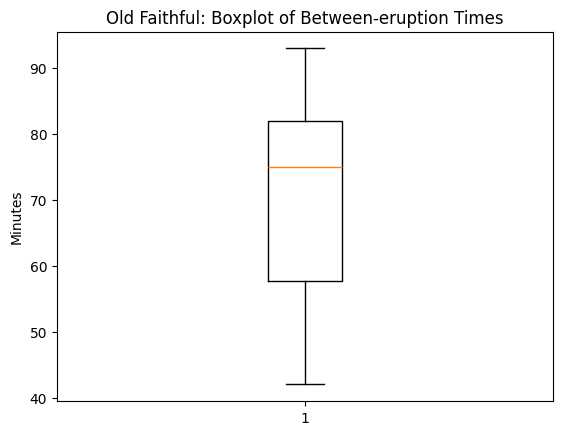

In [ ]:
plt.figure()
plt.boxplot(values, vert=True)
plt.title("Old Faithful: Boxplot of Between-eruption Times")
plt.ylabel("Minutes")
plt.show()

## Wrap-up

We reproduced the examples in the slides:
- mean vs median and outliers
- quartiles, five-number summary, IQR
- sample variance and standard deviation
- Old Faithful stem-and-leaf, histogram table, histograms
- Old Faithful boxplot and IQR outlier rule
